### This project will analyze the job dissatisfaction based on job exit survey

In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


### 2. Identify Missing Values and Drop Unnecessary Columns

In [2]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


### 3. Clean Column Names

In [3]:
# rename names in dete_survey_updated
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ', '_')
# rename names in tafe_survey_updated
colmap={
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender?':'gender',
    'CurrentAge. Current Age':'age',
    'Employment Type. Employment Type':'employment_status',
    'Classification. Classification':'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'
}
tafe_survey_updated.rename(columns=colmap, inplace=True)
print(tafe_survey_updated.shape)

(702, 23)


In [4]:
#checking dete_survey_updated data
dete_survey_updated['cease_date'].value_counts()
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

### Select Resignation Type to Learn About Job Disatisfaction 

In [5]:
sel= dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[sel]
dete_resignations['separationtype'].isnull().value_counts()

False    311
Name: separationtype, dtype: int64

In [6]:
sel= tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[sel]
tafe_resignations['separationtype'].isnull().value_counts()

False    340
Name: separationtype, dtype: int64

In [129]:
print(dete_resignations.shape)
print(tafe_resignations.shape)
dete_resignations['cease_date'].isnull().value_counts()

(311, 35)
(340, 24)


False    300
True      11
Name: cease_date, dtype: int64

### 5. Verify the Data

In [7]:
# clean dete_resignations['cease_date']
a = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations.loc[:,'cease_date'] = a.astype(float)
dete_resignations['cease_date'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [8]:
dete_resignations['dete_start_date'].isnull().value_counts(ascending= True)
type(dete_resignations['cease_date'][3])
tafe_resignations['cease_date'].astype(float).value_counts(ascending= True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

### 6. Create a New Column

In [9]:
# create a new column, dete_resignations['institute_service']
date1 = dete_resignations['cease_date'].astype(float)
date2 = dete_resignations['dete_start_date'].astype(float)
dete_resignations['institute_service'] = date1-date2

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
print(dete_resignations['institute_service'].isnull().value_counts(dropna=False))
print(tafe_resignations['institute_service'].isnull().value_counts(dropna=False))

False    273
True      38
Name: institute_service, dtype: int64
False    290
True      50
Name: institute_service, dtype: int64


### 7. Identify Dissatisfied Employees

In [95]:
a= tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
b= tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()
print(a)
print(b)

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [11]:
def update_vals(s):
    if pd.isnull(s):
        return np.nan
    elif s == '-':
        return False
    else:
        return True
    
tc = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
tc = tc.applymap(update_vals)

# create new coloumn, tafe_resignations['dissatisfied']
tafe_resignations['dissatisfied'] = tc.any(axis=1, skipna=False)
tafe_resignations_up = dete_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [12]:
dete_resignations.columns
dc= dete_resignations[['job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']]
dc = dc.applymap(update_vals)
dete_resignations['dissatisfied']=dc.any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


True    311
Name: dissatisfied, dtype: int64

### 8. Combine the Data and  Clean the Service Column

In [13]:
"""because institute_service columns in the two data sets have differnt 
    format, need to categorize them using different functions """

# categorize data for dete_resignations['institute_service']
def cat(x):
    if pd.isnull(x):
        return np.nan
    elif x <= 3:
        return 'New'
    elif x <= 6:
        return 'Experienced'
    elif x <= 10:
        return 'Established'
    elif x >= 11:
        return 'Veteran'
dete_resignations_up['service_cat'] = dete_resignations_up['institute_service'].apply(cat)
dete_resignations_up['service_cat'].value_counts(dropna=False)

Veteran        100
New             76
Experienced     56
Established     41
NaN             38
Name: service_cat, dtype: int64

In [68]:
tafe_resignations_up['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [14]:
# categorize data for tafe_resignations['institute_service']
def cat(x):
    if pd.isnull(x):
        return np.nan
    elif (x == 'Less than 1 year') or (x == '1-2'):
        return 'New'
    elif (x == '3-4') or (x == '5-6'):
        return 'Experienced'
    elif x == '7-10':
        return 'Established'
    elif (x == '11-20') or (x == 'More than 20 years'):
        return 'Veteran'
tafe_resignations_up['service_cat'] = tafe_resignations_up['institute_service'].apply(cat)
tafe_resignations_up['service_cat'].value_counts(dropna=False)

New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64

In [15]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined_updated = combined.dropna(thresh = 500, axis=1)
combined_updated['service_cat'].value_counts(dropna=False)

New            213
Experienced    152
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [16]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [160]:
combined_updated['dissatisfied'].fillna(True)
combined_updated['service_cat'].value_counts(dropna=False)
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

### 9. Perform Initial Analysis

In [17]:
combined_updated['dissatisfied'].mean()

0.6251944012441679

In [26]:
group = combined_updated.groupby('service_cat')
group['dissatisfied'].sum()
# .mean() function generated error for the group object

service_cat
Established     48
Experienced     80
New            112
Veteran        110
Name: dissatisfied, dtype: int64

In [35]:
pivot_sum = combined_updated.pivot_table(values=['dissatisfied'], \
                             index=['service_cat'],aggfunc =np.sum,\
                             dropna=True, margins=True)
pivot_sum


,dissatisfied
service_cat,
Established,48
Experienced,80
New,112
Veteran,110
All,350


In [40]:
percent = pivot_sum / pivot_sum.loc['All'] *100
print(percent)

             dissatisfied
service_cat              
Established     13.714286
Experienced     22.857143
New             32.000000
Veteran         31.428571
All            100.000000


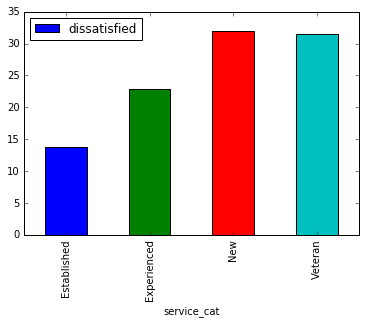

In [45]:
%matplotlib inline
percent[0:4].plot(kind='bar', y='dissatisfied')

In [46]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [57]:
def age_cat(x):
    if pd.isnull(x):
        return np.nan
    elif x[0]== '2':
        return '20-30'
    elif x[0]== '3':
        return '30-40'
    elif x[0]== '4':
        return '40-50'
    elif x[0]== '5':
        return '50 & older'
combined_updated['age'] = combined_updated['age'].apply(age_cat)
combined_updated['age'].value_counts()
   

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


40-50         174
20-30         139
30-40         134
50 & older    126
Name: age, dtype: int64

In [58]:
age_sum = combined_updated.pivot_table(values=['dissatisfied'], \
                             index=['age'],aggfunc =np.sum,\
                             dropna=True, margins=True)
age_sum


,dissatisfied
age,
20-30,85
30-40,86
40-50,114
50 & older,75
All,360


In [59]:
percent = age_sum / age_sum.loc['All'] *100
print(percent)

            dissatisfied
age                     
20-30          23.611111
30-40          23.888889
40-50          31.666667
50 & older     20.833333
All           100.000000


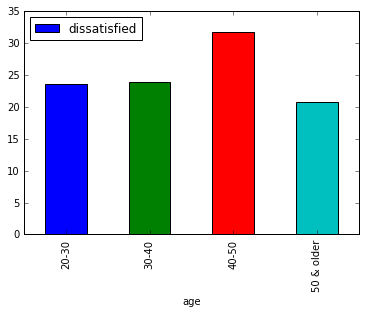

In [60]:
percent[0:4].plot(kind='bar', y='dissatisfied')